# NBA Playoffs

This project uses data from `basketball-reference.com` to ask questions about NBA players, who makes it to the playoffs, and how they perform once they get there. Generally, a few questions to consider looking into are:

* Which people over/under-perform in the playoffs (compared to the regular season).
* Who makes it to the playoffs? Teams with better performing Centers? Forwards Guards? Younger teams?

### Getting the data

* The yearly data on all players for the regular season year `20XX` is found at the url:
```
https://www.basketball-reference.com/leagues/NBA_20XX_totals.html
```
* The yearly playoff data on all players in the playoffs for the year `20XX` is found at the url:
```
https://www.basketball-reference.com/playoffs/NBA_20XX_totals.html
```

Use `pd.read_html` to get data from 2012-2018, combine it into a single (cleaned) dataframe, and save it to a local file (so you are not repeatedly requesting data from the url). Be sure to keep track of which year each row came from!

### Combining playoff and regular season data; cleaning the data; doing descriptive statistics

* For each year, join the regular season data and playoff data for each player. This is tricky, as players are sometimes traded mid-season and will occupy more than one row in a given year.
* Clean the data, create useful new columns, and handle null values appropriately.
* Assess the data through univariate and bivariate analysis. Consider attributions to aggregrate by as well; analyze the aggregates.

### Missingness

Since each dataset (regular season and playoffs) separately has no "unpredictable" missing values, missingness will solely reflect whether a player was present in the playoffs or not. Consider the missingness in a column from the playoffs table and assess its missingness dependent on columns in the regular-season table.

### Hypothesis Test

Find a hypothesis test to perform. You can use the questions at the top of the notebook for inspiration.


---
# Summary of Findings


## Introduction
---




### Results of Cleaning and EDA:
---



### Results of Missingness:
---



### Results of Hypothesis Test
---


---

# Your Code Starts Here

In [2]:
%matplotlib inline
import os

import pandas as pd
import numpy as np
from scipy.stats import ks_2samp

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#HAPPY BIRTHDAY!

data = pd.DataFrame()
for year in range(2012, 2019):

    reg_season_df = pd.read_html('https://www.basketball-reference.com/leagues/NBA_%d_totals.html' % year)[0]
    reg_season_df = reg_season_df.drop(reg_season_df.loc[reg_season_df['Player'] == 'Player'].index).drop('Rk', axis=1)
    
    playoff_df = pd.read_html('https://www.basketball-reference.com/playoffs/NBA_%d_totals.html' % year)[0]
    playoff_df = playoff_df.drop(playoff_df.loc[playoff_df['Player'] == 'Player'].index).drop('Rk', axis=1)
    
    temp = reg_season_df.merge(playoff_df, on = ['Player', 'Pos', 'Age', 'Tm'], how = 'left', suffixes=['_reg_season', '_playoff'])
    temp['Year'] = year
    temp = temp[[temp.columns[-1]] + temp.columns[:-1].tolist()]
    
    data = pd.concat([data, temp])

data = data.reset_index(drop=True)
data.to_csv('data\\basketball_data.csv', index = False)

In [4]:
fp = os.path.join('data', 'basketball_data.csv')
data = pd.read_csv(fp)

### Cleaning and EDA:
---

In [6]:
#get the shape of the original data to verify rows have been successfully dropped
print("Original shape: " + str(data.shape))

temp = data.copy()
#drop the rows with index where "Tm" is "TOT"
temp.drop(temp.loc[temp['Tm'] == "TOT"].index, inplace = True)
#get the new shape of the cleaner data to verify rows have been successfully dropped
print("New shape: " + str(temp.shape))

#map data to the cleaner dataframe
data = temp

Original shape: (4223, 55)
New shape: (3836, 55)


In [7]:
def conference(team):
    west = ['GSW', 'DEN', 'POR', 'HOU', 'UTA', 'OKC', 'SAS', 
            'LAC', 'SAC', 'LAL', 'MIN', 'MEM', 'NOP', 'NOH', 'DAL', 'PHO']
    #if team in western conference, return WEST
    if team in west:
        return 'WEST'
    #if team not in western conference, return EAST
    else:
        return 'EAST'


data['Conf'] = data['Tm'].apply(lambda x: conference(x))

PTS_reg_season                                                    \
Year           2012      2013      2014      2015      2016      2017   
Conf                                                                    
EAST       0.489622  0.489895  0.487234  0.490085  0.494916  0.496302   
WEST       0.510378  0.510105  0.512766  0.509915  0.505084  0.503698   

                
Year      2018  
Conf            
EAST  0.498788  
WEST  0.501212

Text(0.5,0,'Conference')

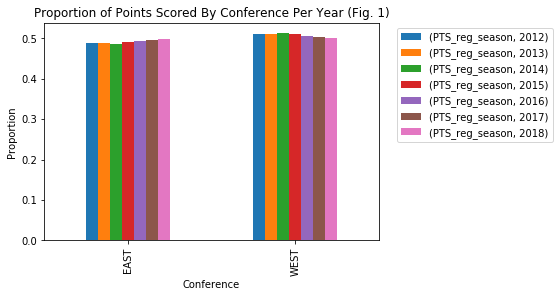

In [8]:
#visualize the proportions of total points per conference in the regular season
#get the total points scored by players in the league per year
total_pts = data.groupby('Year')[['PTS_reg_season']].sum()


#get the proportion of points scored by players in the league by conference per year
by_conf = data.groupby(["Year", "Conf"])[['PTS_reg_season']].sum() / total_pts

display(by_conf.unstack(0))

#plot our findings
pts_prop = by_conf.unstack(0).plot(kind = 'bar', legend = False, 
                                   title = "Proportion of Points Scored By Conference Per Year (Fig. 1)")
#move the legend outside the plot
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
#add labels
pts_prop.set_ylabel("Proportion")
pts_prop.set_xlabel("Conference")

PTS_playoff                                                           
Year        2012      2013      2014     2015      2016      2017      2018
Conf                                                                       
EAST    0.511513  0.507572  0.449405  0.46559  0.503673  0.511131  0.518129
WEST    0.488487  0.492428  0.550595  0.53441  0.496327  0.488869  0.481871

Text(0.5,0,'Conference')

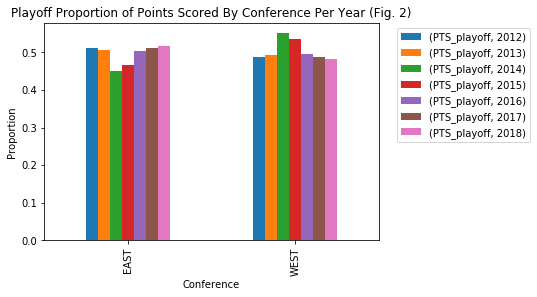

In [9]:
#visualize the proportions of total points per conference in the playoff season
#get the total points scored by players in the league per year
total_pts = data.groupby('Year')[['PTS_playoff']].sum()

#get the proportion of points scored by players in the league by conference per year
by_conf = data.groupby(["Year", "Conf"])[['PTS_playoff']].sum() / total_pts

display(by_conf.unstack(0))

#plot our findings
pts_prop = by_conf.unstack(0).plot(kind = 'bar', legend = False, 
                                   title = "Playoff Proportion of Points Scored By Conference Per Year (Fig. 2)")
#move the legend outside the plot
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
#add labels
pts_prop.set_ylabel("Proportion")
pts_prop.set_xlabel("Conference")

We could see from Fig 2 that the proportion of points scored per year in the playoffs tends to be consistent between conferences, except for two years: 2014 and 2015. For these two years, the West conference has a considerably higher proportion. If we Google the NBA winners in 2014 and 2015, we see that two Western conference teams win these years, the San Antonio Spurs (SAS) and Golden State Warriors (GSW), respectively, win these years. Thus, we have some observational evidence that the West may be better than the East in these two years.

,PTS_reg_season,PTS_playoff
Pos,,
C,0.172757,0.148392
PF,0.203925,0.194571
PG,0.212680,0.224755
SF,0.181794,0.191600
SG,0.228844,0.240682


Text(0.5,0,'Position')

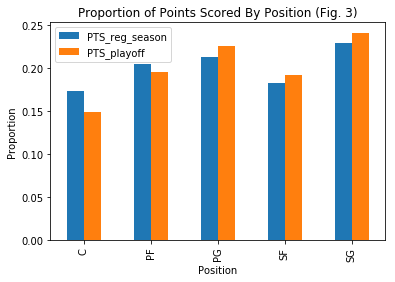

In [10]:
reg_total_pts = data['PTS_reg_season'].sum()
playoff_total_pts = data['PTS_playoff'].sum()
by_pos = data.groupby('Pos').agg({'PTS_reg_season': lambda x: np.sum(x) / reg_total_pts, 
                                  'PTS_playoff': lambda x: np.sum(x) / playoff_total_pts})
display(by_pos)
pos_plot = by_pos.plot(kind = 'bar', 
                       title = "Proportion of Points Scored By Position (Fig. 3)")
pos_plot.set_ylabel("Proportion")
pos_plot.set_xlabel("Position")

We see that there is a clear difference between the points scored by position in both the regular season and in playoff. Most noteablly, it seems that the positions with a lower proportion of points scored in the regular season scored an even lower proportion in the playoffs, and the positions with a higher proportion of points scored in the regular season scored an even higher proportion in the playoffs. This may suggest that teams change up their stategy during playoffs and rely on certain positions to play different roles.

In [11]:
reg_fg_prop = data.groupby('Pos')['FG_reg_season'].sum() / data.groupby('Pos')['FGA_reg_season'].sum()
playoff_fg_prop = data.groupby('Pos')['FG_playoff'].sum() / data.groupby('Pos')['FGA_playoff'].sum()
pd.DataFrame([reg_fg_prop, playoff_fg_prop], index = ['FG%_reg_season', 'FG%_playoff']).T

,FG%_reg_season,FG%_playoff
Pos,,
C,0.517452,0.513973
PF,0.471642,0.463840
PG,0.428954,0.428773
SF,0.436670,0.437462
SG,0.429758,0.419138


,PTS_reg_season
Pos,
C,0.626271
PF,0.746090
PG,0.698474
SF,0.739343
SG,0.684422


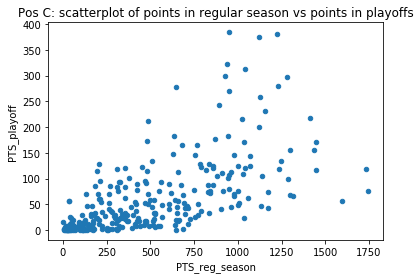

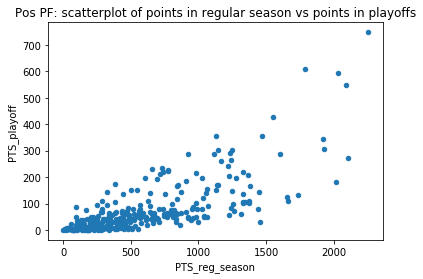

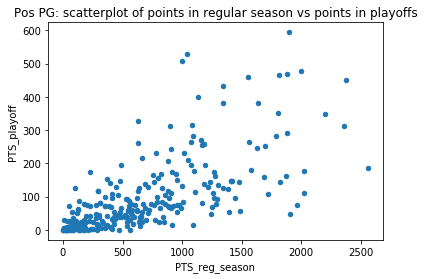

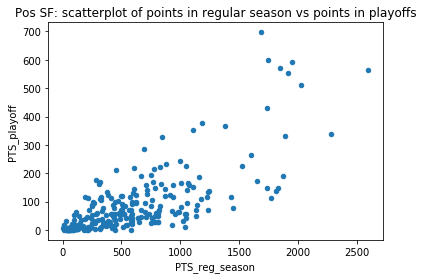

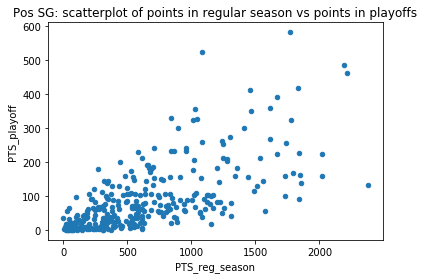

In [12]:
for pos, group in data.groupby('Pos'):
    group.plot.scatter(x = 'PTS_reg_season', y = 'PTS_playoff',
                       title = 'Pos %s: scatterplot of points in regular season vs points in playoffs' % pos)
    
pd.DataFrame(data.groupby('Pos')['PTS_reg_season'].corr(data['PTS_playoff']))

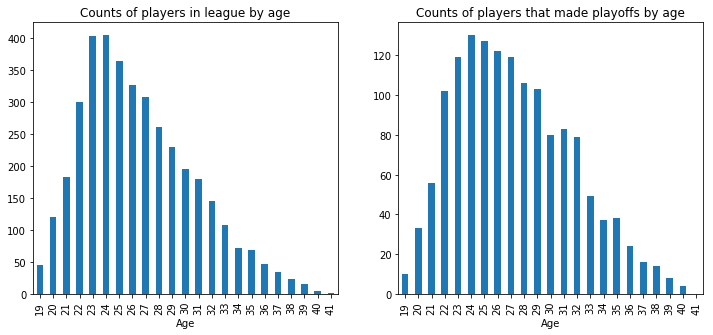

In [58]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
data.groupby('Age')['PTS_reg_season'].count().plot(kind = 'bar', ax=ax[0], title = 'Counts of players in league by age')
data.groupby('Age')['PTS_playoff'].count().plot(kind = 'bar', ax=ax[1], title = 'Counts of players that made playoffs by age')

In [129]:
data.groupby(['Year', 'Age'])['PTS_playoff'].count().unstack(0)

Year,2012,2013,2014,2015,2016,2017,2018
Age,,,,,,,
19,1.0,2.0,0.0,0.0,3.0,1.0,3.0
20,4.0,2.0,5.0,5.0,2.0,7.0,8.0
21,10.0,5.0,7.0,5.0,7.0,9.0,13.0
22,15.0,14.0,15.0,9.0,16.0,20.0,13.0
23,20.0,17.0,13.0,19.0,21.0,14.0,15.0
24,20.0,24.0,12.0,18.0,17.0,23.0,16.0
25,19.0,17.0,20.0,17.0,16.0,20.0,18.0
26,17.0,13.0,19.0,22.0,14.0,18.0,19.0
27,14.0,19.0,18.0,15.0,19.0,17.0,17.0


We see that the counts of the players in the league by age roughly follow a skewed Poisson distribution. However, the counts of players that made the playoffs by age is fairly Poisson, but there is biased toward players in their late 20s to early 30s. The proportion of players that make playoffs are roughly similar to the age, except for this biased area, so we have reason to believe that these players have more experience and talent to make playoffs compared to younger players. However, we have to note as the years go by, players will age, so looking at the table grouped by age and year, we see that many players do then to drop off in their 30s. Also, young players in their early 20s may seem to not have as much experience, so we don't see as many young players in playoffs. We also have to note that there may be less older players in the league, so there is lower chance we see them in playoffs. 

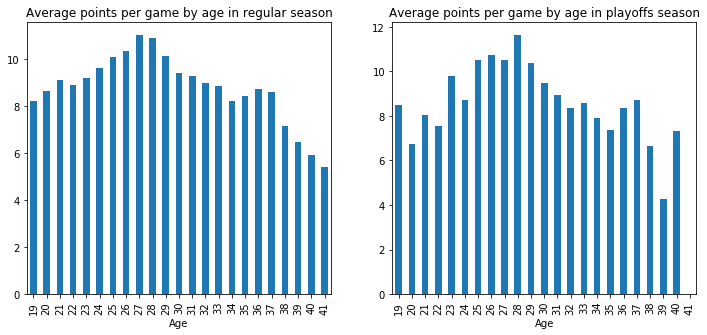

In [127]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
(data.groupby('Age')['PTS_reg_season'].sum() / data.groupby('Age')['G_reg_season'].sum()).plot(kind='bar', ax=ax[0], 
                                                                                                   title = 'Average points per game by age in regular season')
(data.groupby('Age')['PTS_playoff'].sum() / data.groupby('Age')['G_playoff'].sum()).plot(kind='bar', ax=ax[1],
                                                                                            title = 'Average points per game by age in playoffs season')

### Missingness:
---

In [46]:
#helper method to shuffle values
def shuffle(df, col):
    # shuffle col
    shuffled_col = (
        df[col]
        .sample(replace=False, frac=1)
        .reset_index(drop=True)
    )
        
    # put them in a table
    shuffled = (
        df
        .assign(**{
            col: shuffled_col,
            'is_null': df['G_playoff'].isnull()
        })
    )
    return shuffled

In [130]:
#get the desired column names
cols = ['PTS_reg_season', 'FG%_reg_season', '3P%_reg_season', 'TRB_reg_season', 
        'BLK_reg_season', 'AST_reg_season', 'TOV_reg_season']

#perform on each of the desired columns
for col in cols:
    
    #list to hold results of each repetition
    ks_list = []
    
    #get the observed statistic
    observed_data = data.assign(is_null=data['G_playoff'].isnull())
    observed_data = observed_data.groupby('is_null')[col]
    observed = ks_2samp(observed_data.get_group(True), observed_data.get_group(False)).statistic
    
    #perform 100 repetitions to getting the test statistic
    for _ in range(100):
        #shuffle 
        shuffled = shuffle(data, col)
        grps = shuffled.groupby('is_null')[col]
        ks = ks_2samp(grps.get_group(True), grps.get_group(False)).statistic
        
        #append to list
        ks_list.append(ks)
    
    pval = np.mean(ks_list > observed)
    print(pval)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.43


In [48]:
#get the desired column names
cols = ['PTS_reg_season', 'FG%_reg_season', '3P%_reg_season', 'TRB_reg_season', 
        'BLK_reg_season', 'AST_reg_season', 'TOV_reg_season']

#perform on each of the desired columns
for col in cols:
    
    #list to hold results of each repetition
    means = []
    
    #calculate observed statistic
    observed = data.assign(is_null= data['G_playoff']
                                .isnull()).groupby('is_null')[col].mean().diff().abs().iloc[-1]
    
    
    #perform 100 repetitions to getting the test statistic
    for _ in range(100):
        #shuffle 
        shuffled = shuffle(data, col)
        #get mean
        mean = shuffled.groupby('is_null')[col].mean().diff().abs().iloc[-1]
        
        #append to list
        means.append(mean)
        
    #calculate p-value
    pval = np.mean(means > observed)
    #show results
    print(col + " p-value: " +str(pval))


PTS_reg_season p-value: 0.0
FG%_reg_season p-value: 0.0
3P%_reg_season p-value: 0.0
TRB_reg_season p-value: 0.0
BLK_reg_season p-value: 0.0
AST_reg_season p-value: 0.0
TOV_reg_season p-value: 0.0


### Hypothesis Test
---

In [114]:
#list to hold point differentials
diffs = []

data['PPG_reg_season'] = data['PTS_reg_season'] / data['G_reg_season']

#repeat procedure 500 times
for _ in range(500):

    east_ppg = data.loc[data['Conf'] == 'EAST', 'PPG_reg_season'].sample(n=15, replace = False).mean()
    west_ppg = data.loc[data['Conf'] == 'WEST', 'PPG_reg_season'].sample(n=15, replace = False).mean()
    
    curr_diff = abs(west_ppg - east_ppg)
    diffs.append(curr_diff)

obs = abs(data.loc[data['Conf'] == 'WEST']['PPG_reg_season'].mean() - data.loc[data['Conf'] == 'EAST']['PPG_reg_season'].mean())
    
pval = np.mean(np.array(diffs) > obs)
print("p-value: " + str(pval))


p-value: 0.984


In [119]:
#list to hold point differentials
diffs = []

data['PPG_playoff'] = data['PTS_playoff'] / data['G_playoff']

#repeat procedure 500 times
for _ in range(500):

    east_ppg = data.loc[data['Conf'] == 'EAST', 'PPG_playoff'].dropna().sample(n=15, replace = False).mean()
    west_ppg = data.loc[data['Conf'] == 'WEST', 'PPG_playoff'].dropna().sample(n=15, replace = False).mean()
    
    curr_diff = abs(west_ppg - east_ppg)
    diffs.append(curr_diff)

obs = abs(data.loc[data['Conf'] == 'WEST']['PPG_playoff'].mean() - data.loc[data['Conf'] == 'EAST']['PPG_playoff'].mean())
    
pval = np.mean(np.array(diffs) > obs)
print("p-value: " + str(pval))

p-value: 0.902
